In [2]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

SEED = 42

Wall time: 25.2 s


## Load Database/Import Data 

In [3]:
df = pd.read_csv("diamonds.csv")

In [4]:
df.sort_values('table')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
11368,11369,1.04,Ideal,I,VS1,62.9,43.0,4997,6.45,6.41,4.04
35633,35634,0.29,Very Good,E,VS1,62.8,44.0,474,4.20,4.24,2.65
5979,5980,1.00,Fair,I,VS1,64.0,49.0,3951,6.43,6.39,4.10
22701,22702,0.30,Fair,E,SI1,64.5,49.0,630,4.28,4.25,2.75
25179,25180,2.00,Fair,H,SI1,61.2,50.0,13764,8.17,8.08,4.97
...,...,...,...,...,...,...,...,...,...,...,...
52861,52862,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52860,52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
51342,51343,0.79,Fair,G,SI1,65.3,76.0,2362,5.52,5.13,3.35
50773,50774,0.81,Fair,F,SI2,68.8,79.0,2301,5.26,5.20,3.58


In [5]:
df.drop(df.columns[0],axis = 1, inplace = True)

In [6]:
df = df[[c for c in df if c not in ['price']] + ['price']]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
#drop the rows with value 0 in x,y,z
df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)

In [9]:
df.shape

(53920, 10)

In [10]:
df.isna().any().any()
# df.isna().sum()

False

In [11]:
# Encode variables with more than 2 Classes
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [12]:
df = df[[c for c in df if c not in ['price']] + ['price']]
df.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,1,0,0,0,0,326
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,1,0,0,0,0,0,326
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,1,0,0,0,327
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,1,0,0,0,0,0,1,0,0,334
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,1,0,0,1,0,0,0,0,335


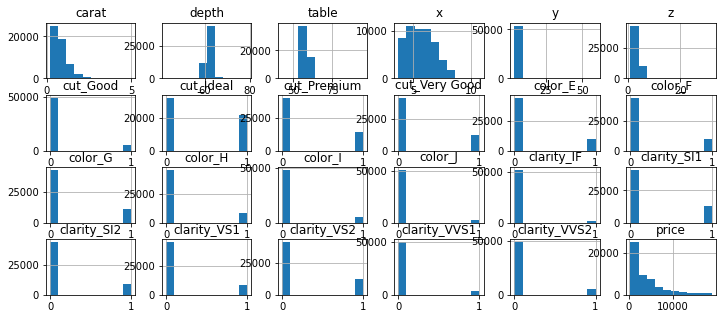

In [14]:
df.hist(figsize=(12,5), layout=(4,6))
plt.show()

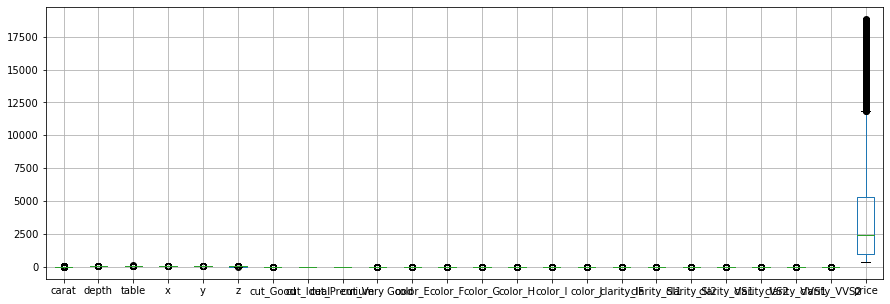

In [15]:
df.boxplot(figsize=(15,5))
plt.show()

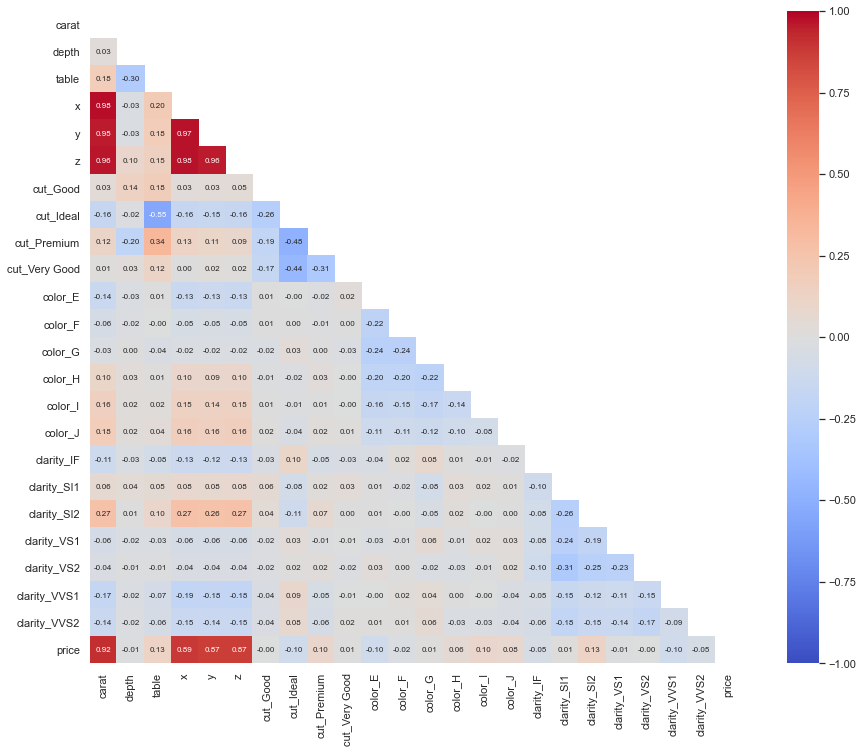

In [46]:
# correlation matrix heatmap visualization
sns.set(style="white")

# Generate a mask for the upper triangle
matrix = np.triu(df.corr())

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(16,12))

# Plot the heatmap
_ = sns.heatmap(df.corr(), mask=matrix, annot=True, annot_kws={"size": 8}, square=True, 
                cmap='coolwarm' , vmin=-1, vmax=1, fmt='.2f') 

Wall time: 53.3 s


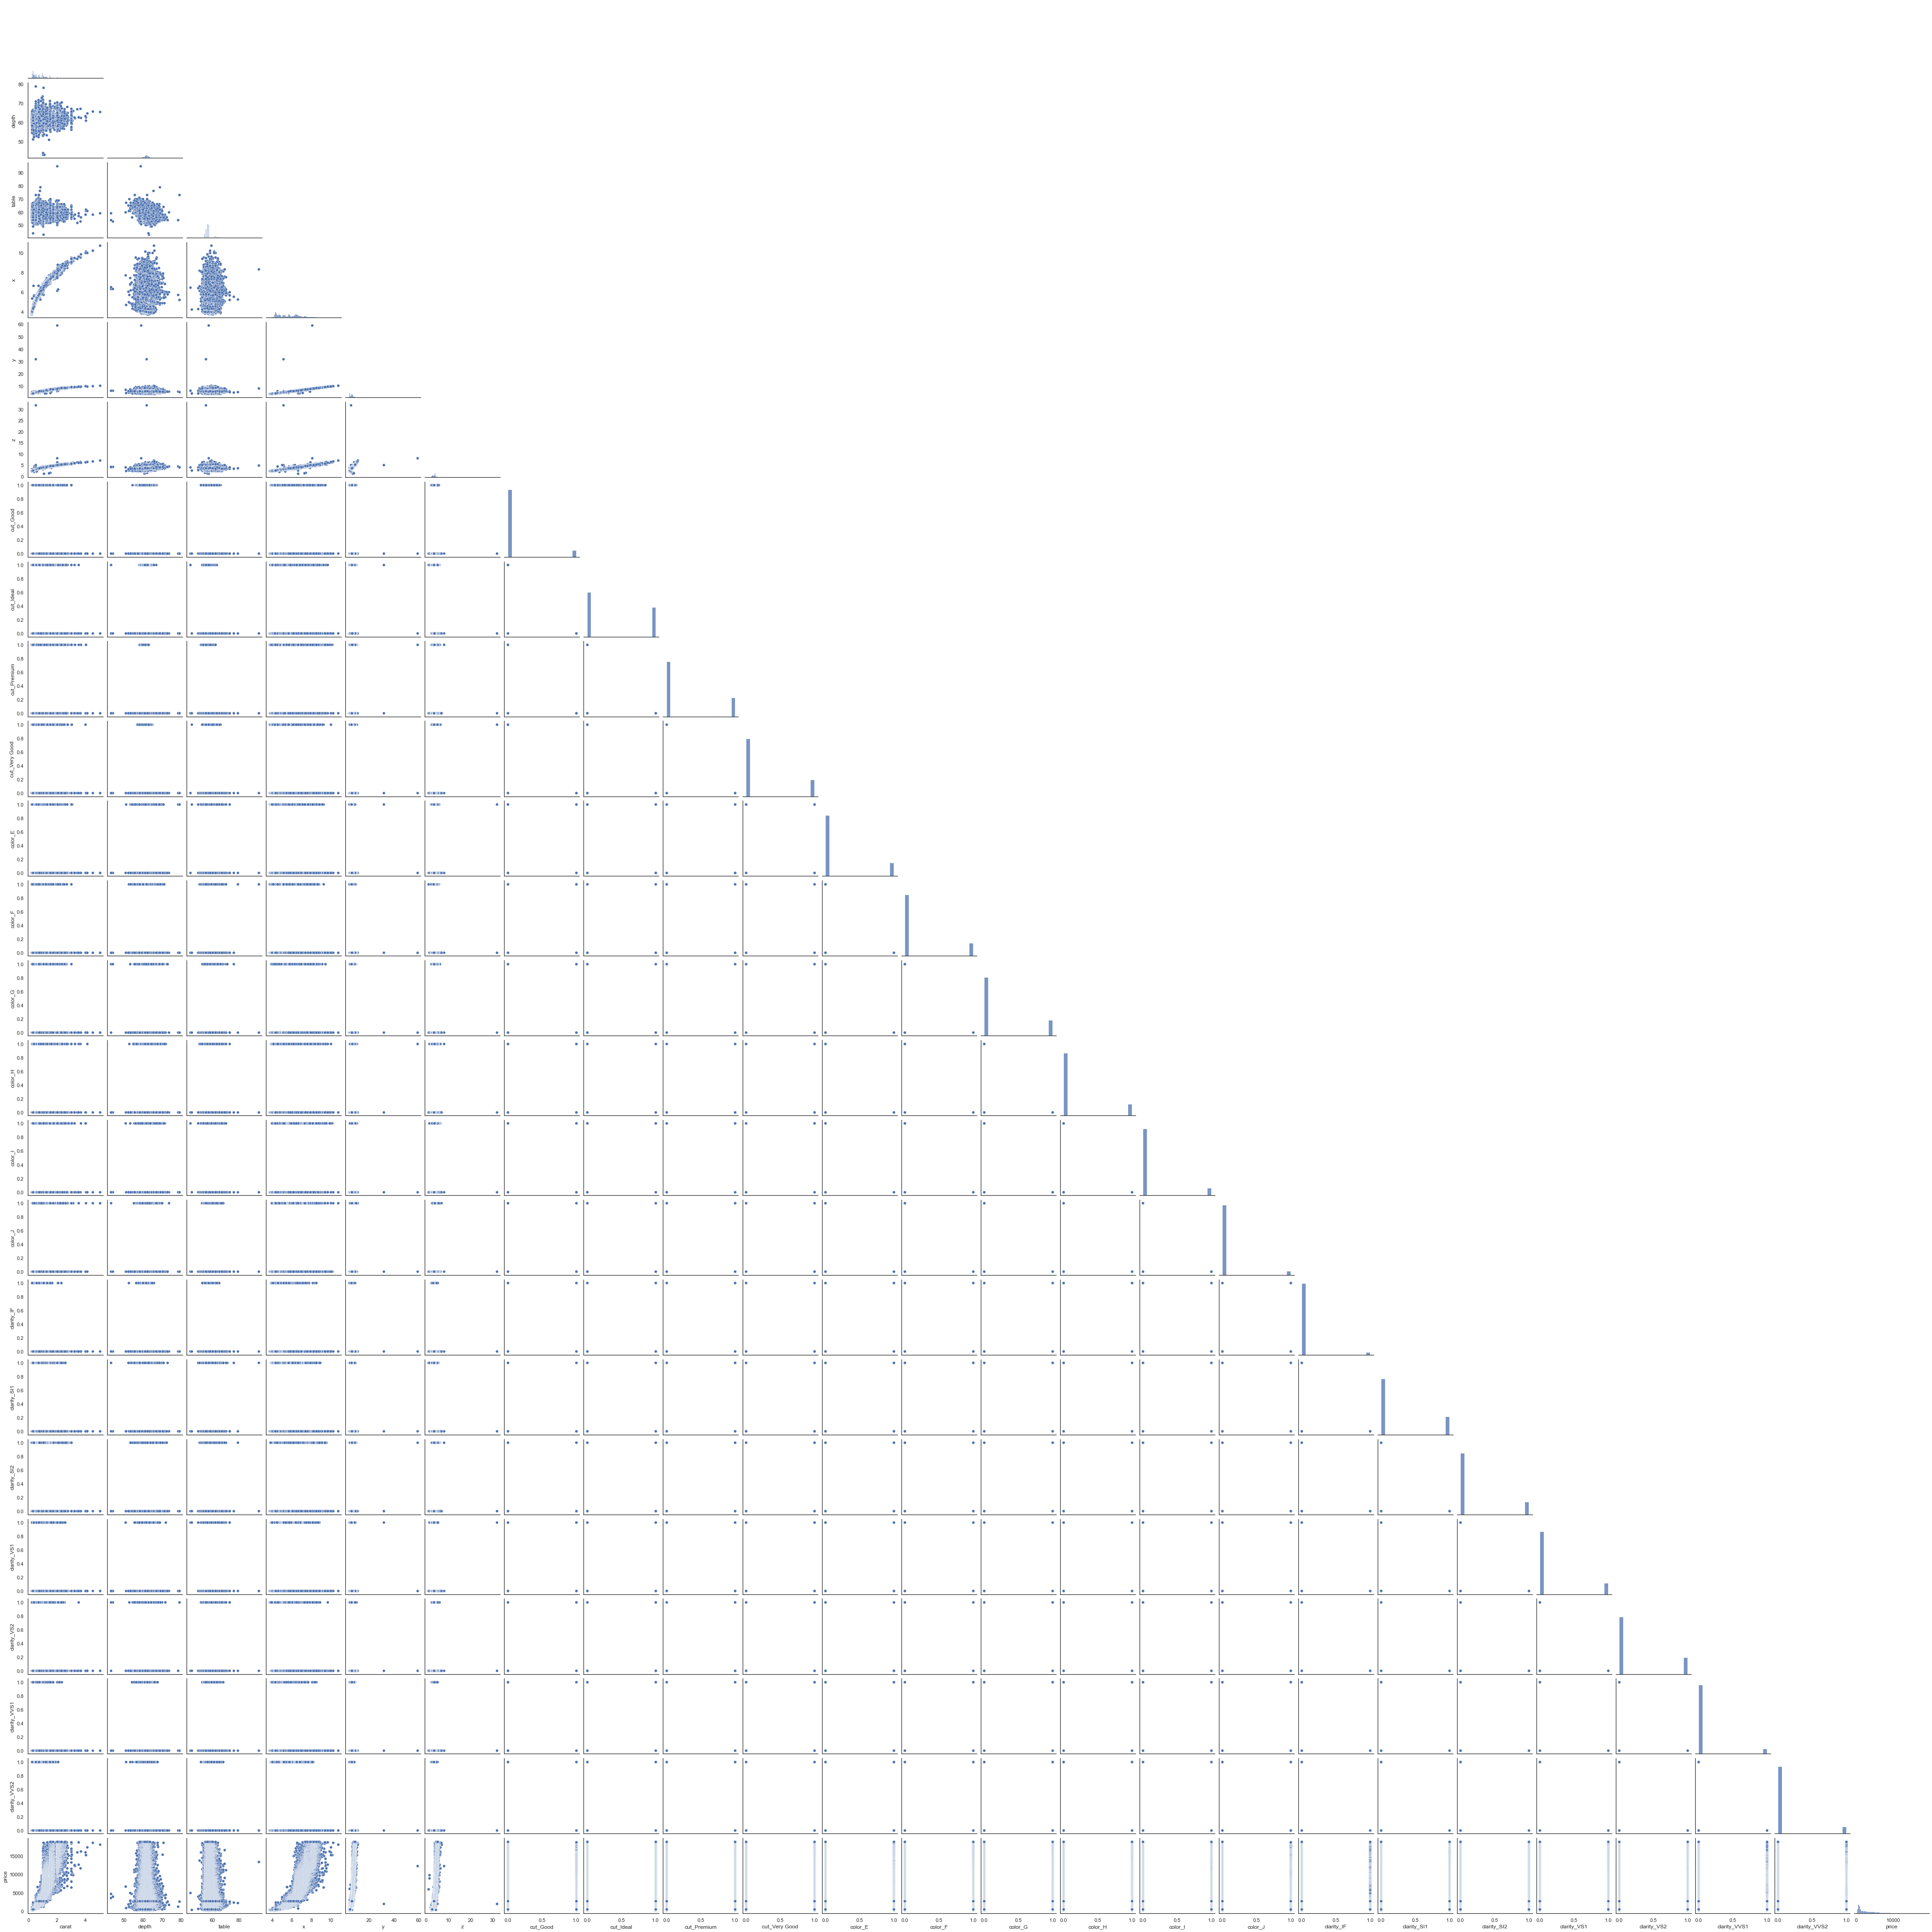

In [47]:
%%time
_ = sns.pairplot(df, corner=True, palette = 'inferno')

Wall time: 380 ms


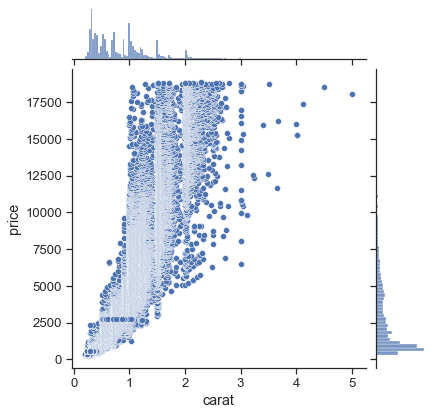

In [75]:
%%time
#_ = sns.jointplot(x="carat", y="price", data=df, kind="hist")
#_ = sns.jointplot(x="carat", y="price", data=df, kind="kde")
#_ = sns.jointplot(x="carat", y="price", data=df, kind="reg")
#_ = sns.jointplot(x="carat", y="price", data=df, kind="resid")
_ = sns.jointplot(x="carat", y="price", data=df)
#_ = sns.jointplot(x="carat", y="price", data=df, hue="depth")


## Data Preprocessing/Feature Engineering

## Model Selection

### Split Data (Features/Target, Train/Validation/Testing)

In [13]:
X = df.drop(['price'], axis=1)
y = df['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

#### Feature Scaling (Normalization/Standardization)

In [15]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_test

array([[-1.02798729, -0.66128068,  0.69339963, ..., -0.54240052,
        -0.27053165, -0.32175912],
       [ 1.03410178,  0.03935901, -0.65995306, ..., -0.54240052,
        -0.27053165, -0.32175912],
       [ 1.51806146,  0.59987076,  0.69339963, ..., -0.54240052,
        -0.27053165, -0.32175912],
       ...,
       [ 0.02409897, -1.78230418, -0.2088355 , ..., -0.54240052,
        -0.27053165, -0.32175912],
       [-1.02798729,  0.17948694,  0.69339963, ..., -0.54240052,
         3.69642512, -0.32175912],
       [-0.01798448, -0.24089687,  0.69339963, ..., -0.54240052,
        -0.27053165, -0.32175912]])

### Train a Model
### (start with Logistic Regression for Classification problems, Linear Regression for Regression problems)

In [18]:
results = []
names = []
scoring='r2'

In [145]:
%%time
lr_baseline = LinearRegression()
scores = cross_val_score(lr_baseline, X_train,y_train, scoring=scoring, cv=5,n_jobs=-1)
baseline_mean_score = scores.mean()
print("Baseline Model's score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
results.append(scores)
names.append('LR')

Baseline Model's score: 0.92 (avg) 0.00 (std)
Wall time: 38.5 s


In [146]:
results

[array([0.91803726, 0.91876365, 0.91563548, 0.92089944, 0.92257921])]

In [147]:
names

['LR']

### Evaluate Multiple Models and Select Best Model

In [148]:
%%time
KNNReg = KNeighborsRegressor()
scores = cross_val_score(KNNReg, X_train,  y_train, cv=5,  scoring=scoring)
msg = ("KNN Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
print(msg)
results.append(scores)
names.append('KNN')

KNN Mean score: 0.95 (avg) 0.00 (std)
Wall time: 29.4 s


In [149]:
results

[array([0.91803726, 0.91876365, 0.91563548, 0.92089944, 0.92257921]),
 array([0.9478891 , 0.9479176 , 0.94803023, 0.95284092, 0.95007513])]

In [150]:
names

['LR', 'KNN']

In [151]:
%%time
MLPReg = MLPRegressor()
scores = cross_val_score(MLPReg, X_train,  y_train, cv=5,  scoring=scoring)
msg = ("MLPReg Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
print(msg)
results.append(scores)
names.append('MLP')

MLPReg Mean score: 0.94 (avg) 0.03 (std)
Wall time: 2min 36s


In [152]:
results

[array([0.91803726, 0.91876365, 0.91563548, 0.92089944, 0.92257921]),
 array([0.9478891 , 0.9479176 , 0.94803023, 0.95284092, 0.95007513]),
 array([0.96026376, 0.94628285, 0.87647097, 0.96247754, 0.96402431])]

In [153]:
names

['LR', 'KNN', 'MLP']

In [154]:
%%time
DT = DecisionTreeRegressor()
scores = cross_val_score(DT, X_train,  y_train, cv=3,  scoring=scoring)
msg = ("DT Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
print(msg)
results.append(scores)
names.append('DT')

DT Mean score: 0.95 (avg) 0.00 (std)
Wall time: 906 ms


In [155]:
results

[array([0.91803726, 0.91876365, 0.91563548, 0.92089944, 0.92257921]),
 array([0.9478891 , 0.9479176 , 0.94803023, 0.95284092, 0.95007513]),
 array([0.96026376, 0.94628285, 0.87647097, 0.96247754, 0.96402431]),
 array([0.94644415, 0.9497353 , 0.95471508])]

In [156]:
names

['LR', 'KNN', 'MLP', 'DT']

In [157]:
%%time
RF = RandomForestRegressor()
scores = cross_val_score(RF, X_train,  y_train, cv=3,  scoring=scoring)
msg = ("RF Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
print(msg)
results.append(scores)
names.append('RF')

RF Mean score: 0.97 (avg) 0.00 (std)
Wall time: 40 s


In [158]:
results

[array([0.91803726, 0.91876365, 0.91563548, 0.92089944, 0.92257921]),
 array([0.9478891 , 0.9479176 , 0.94803023, 0.95284092, 0.95007513]),
 array([0.96026376, 0.94628285, 0.87647097, 0.96247754, 0.96402431]),
 array([0.94644415, 0.9497353 , 0.95471508]),
 array([0.97043723, 0.97282078, 0.9748479 ])]

In [159]:
names

['LR', 'KNN', 'MLP', 'DT', 'RF']

In [90]:
# %%time
# SVReg = SVR()
# scores = cross_val_score(SVReg, X_train,  y_train, cv=3,  scoring=scoring)
# msg = ("SVR Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
# print(msg)
# results.append(scores)
# names.append('SVR')

SVR Mean score: 0.40 (avg) 0.01 (std)
Wall time: 5min 13s


In [167]:
# %%time
# NB = GaussianNB()
# scores = cross_val_score(NB, X_train,  y_train, cv=3,  scoring=scoring)
# msg = ("NB Mean score: {:.2f} (avg) {:.2f} (std)".format(scores.mean(), scores.std()))
# print(msg)
# results.append(scores)
# names.append('NB')

NB Mean score: 0.75 (avg) 0.01 (std)
Wall time: 2min 21s


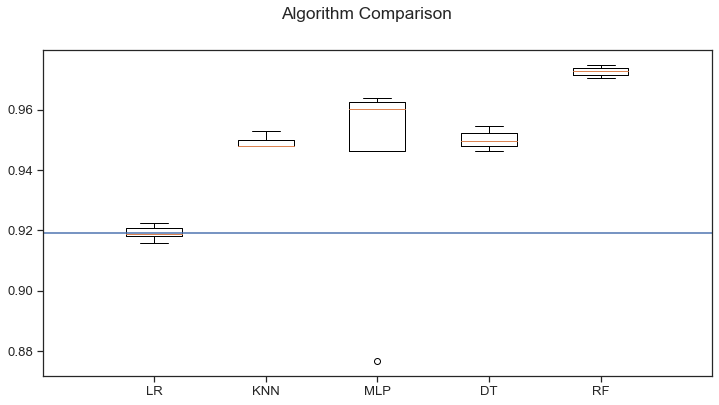

In [160]:
# fig = plt.figure(figsize=(12,6))
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.plot([-2,19], [baseline_mean_score, baseline_mean_score])
# plt.xlim(0, 6)
# plt.show()

### Hyperparameter Fine-tuning for final selected model # Random Forest

### Evaluate the fine-tuned Model (whether it will generalize well with unseen data - testing dataset)

In [137]:
r2score = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print('Final Model (Neural Networks) Metrics -')
print('\tR2 Score:', r2score)
print('\tMean Absolute Error:', mae)
print('\tMean Square Error:', mse)

Final Model (Neural Networks) Metrics -
	R2 Score: 0.9762926218612508
	Mean Absolute Error: 326.0117211736155
	Mean Square Error: 369739.4007408698


In [169]:
%%time
# Hyperparameter fine-tuning for Random forest
parameters = {'n_estimators': [300, 500, 700],
              'max_depth': [5, None],
              'min_samples_split': [2, 3, 5]}
#               'min_samples_leaf': [2, 3, 4],
#               'max_features': ['sqrt', 'log2']}
    
gs_clf = GridSearchCV(RandomForestRegressor(random_state=SEED),
                      parameters, 
                      cv=5,
                      scoring='r2',
#                       scoring='f1_macro',
#                       scoring='roc_auc_ovr',
                      n_jobs=-1)
_ = gs_clf.fit(X_train, y_train)

final_clf = gs_clf.best_estimator_

print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)

RandomForestRegressor(n_estimators=500, random_state=42)
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
0.9738123036207386
Wall time: 36min 23s


## Post-mortem Analysis

In [19]:
%%time
rf = RandomForestRegressor(oob_score=True, n_jobs=-1, random_state=SEED)
rf.fit(X_train, y_train)

Wall time: 10.5 s


RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [21]:
import pickle

In [53]:
filename = 'diamond_Price_Prediction_scaler.sav'
pickle.dump(scaler, open(filename, 'wb'))

loaded_scaler = pickle.load(open(filename, 'rb'))
scaler_result = loaded_scaler.transform(X_test)
print(scaler_result)


[[ -3.84334337 -43.72349325 -25.60973187 ...  -1.83659885  -1.34371903
   -1.42528805]
 [  0.49564779 -43.23259728 -26.22025304 ...  -1.83659885  -1.34371903
   -1.42528805]
 [  1.51398245 -42.8398805  -25.60973187 ...  -1.83659885  -1.34371903
   -1.42528805]
 ...
 [ -1.62957237 -44.50892681 -26.01674598 ...  -1.83659885  -1.34371903
   -1.42528805]
 [ -3.84334337 -43.13441809 -25.60973187 ...  -1.83659885  14.39302701
   -1.42528805]
 [ -1.71812321 -43.42895567 -25.60973187 ...  -1.83659885  -1.34371903
   -1.42528805]]


In [56]:

filename = 'diamond_Price_Prediction_model.sav'
pickle.dump(rf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(scaler_result)
#print(result)
print(y_test)

34704      874
21099     9273
23685    11743
39200     1064
35560      906
         ...  
26871    16800
17970     7266
374       2809
32353      789
2087      3112
Name: price, Length: 16176, dtype: int64


In [27]:
X_test[0]

array([-1.02798729, -0.66128068,  0.69339963, -1.22347292, -1.17364017,
       -1.26879511, -0.31651799, -0.8134534 ,  1.69891913, -0.53753044,
       -0.472221  ,  2.16058287, -0.51248096, -0.42693202, -0.33742011,
       -0.23453986,  5.41222088, -0.56678461, -0.45076353, -0.42328284,
       -0.54240052, -0.27053165, -0.32175912])

In [41]:

loaded_model = pickle.load(open(filename, 'rb'))
user_input = X_test[[10]]
user_pred = loaded_model.predict(user_input)
print(user_pred)


[948.76]


In [20]:
y_pred = rf.predict(X_test)
r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Final Model (RandomForestRegressor) Metrics -')
print('\tR2 Score:', r2score)
print('\tMean Absolute Error:', mae)
print('\tMean Square Error:', mse)

Final Model (RandomForestRegressor) Metrics -
	R2 Score: 0.9766406237017738
	Mean Absolute Error: 289.91854664685485
	Mean Square Error: 364291.8654780507


In [33]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

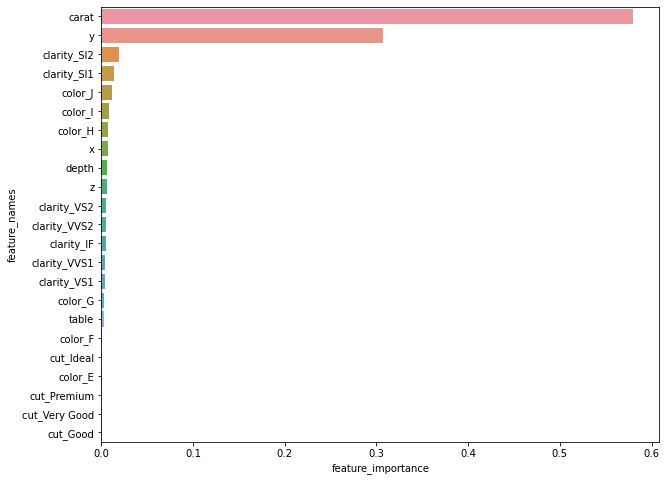

In [34]:
plt.figure(figsize=(10,8))
_ = sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])

In [74]:
own_pred = rf.predict(X_test)
for n in range(100):
    print("target value ",str(own_pred[n]), "VS", str(y_test.iloc[n]),"% as", (y_test.iloc[n]) / (own_pred[n])*100)
    n += 1

target value  1028.8316666666665 VS 874 % as 84.9507289012294
target value  7800.37 VS 9273 % as 118.87897625369052
target value  11448.64 VS 11743 % as 102.5711350867876
target value  1055.06 VS 1064 % as 100.84734517468202
target value  866.98 VS 906 % as 104.50068052319546
target value  4207.37 VS 3528 % as 83.85285819882729
target value  3100.81 VS 2638 % as 85.07454503823195
target value  994.73 VS 894 % as 89.87363405145115
target value  1998.57 VS 2247 % as 112.43038772722498
target value  5249.32 VS 4548 % as 86.63979334466178
target value  948.76 VS 926 % as 97.60107930351195
target value  890.34 VS 795 % as 89.29173124873644
target value  521.7 VS 526 % as 100.82422848380294
target value  6401.76 VS 5638 % as 88.06953087900827
target value  1330.04 VS 1337 % as 100.5232925325554
target value  632.59 VS 625 % as 98.80017072669501
target value  3492.5 VS 3710 % as 106.22763063707946
target value  435.66 VS 504 % as 115.68654455309186
target value  4398.87 VS 4416 % as 100.38941